In [45]:
from astropy.io import fits
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
from tabulate import tabulate
'''Karan Kumar 14906619'''

'Karan Kumar 14906619'

Load in the fits data and open the stars dataframe

In [2]:
dr3stars = fits.open('gaiadr3_cluster_stars.fits')
dr3stars.info()
#print(dr3stars[1].columns)
stars = pd.DataFrame(dr3stars[1].data)
stars['Name'] = stars['Name'].str.strip()

Filename: gaiadr3_cluster_stars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   ()      
  1  members.dat    1 TableHDU       331   1291929R x 56C   [A20, I4, I19, I1, F10.8, F12.8, F10.8, F12.8, F10.8, F12.8, E11.4, E11.4, F10.8, E11.4, F10.8, E11.4, F10.8, F11.8, F11.8, E11.4, E11.4, E11.4, E11.4, E11.4, E11.4, I2, F12.8, F10.7, F11.8, F10.8, F19.8, F16.8, F18.8, F17.8, F18.8, F17.8, F10.7, F10.7, F10.7, E11.4, E11.4, E11.4, E9.3, F12.8, F4.1, F6.1, F5.1, F11.7, F11.8, F6.1, F12.7, F13.8, F5.1, A13, I1, I1]   


In [3]:
stars

,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,o_RVd,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS
0,1636-283,0,6032349260227596544,0,0.747692,249.708525,0.201080,-28.585117,0.115789,351.679705,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
1,1636-283,0,6032358331198284160,1,1.000000,249.866424,0.020684,-28.402037,0.013691,351.914287,...,8.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
2,1636-283,0,6032358331198285696,1,0.843798,249.865221,0.046356,-28.399406,0.029595,351.915643,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
3,1636-283,0,6032358331198286080,1,1.000000,249.861159,0.045101,-28.400698,0.030237,351.912273,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
4,1636-283,0,6032358670488486784,1,1.000000,249.939480,0.038724,-28.429366,0.023344,351.935370,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291924,vdBergh_92,7163,3045840104515988992,1,1.000000,106.116546,0.110176,-11.474387,0.111851,224.621323,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
1291925,vdBergh_92,7163,3045840074455065088,1,0.838193,106.136236,0.049847,-11.471452,0.049169,224.627544,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
1291926,vdBergh_92,7163,3045840074453671680,1,0.639341,106.135606,0.056229,-11.468653,0.058581,224.624770,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,VARIABLE,0,0
1291927,vdBergh_92,7163,3045840654267074048,1,0.738133,106.159649,0.058318,-11.436082,0.062037,224.606570,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0


In [4]:
#number of stars in each cluster
clcounts = stars.groupby(['Name']).size().reset_index(name='count')

Use dataframe.sample function to sample 4 clusters with more than 1000 stars,print the resulting clusters
Here im assume the star is in the cluster regardless of probability

In [5]:

def sample_n_clusters(clusters, sample_size,count):
    '''Select n number of clusters to sample, clusters must have more than 1000 members
    for each run of this cell the clusters are randomized
    input: 
    clusters: panda dataframe of clustes
    sample_size: int number of clusters to sample n
    count: number of memebers in a cluster
    
    return:
    df of sample clusters with more than 1000 stars'''
    sample_cluster = clusters[clusters['count'] >count].sample(n=sample_size)
    return sample_cluster
sample_size  = 4
my_sample_cluster = sample_n_clusters(clcounts,sample_size,1000)
my_sample_cluster

,Name,count
1327,Collinder_261,3071
4505,NGC_2243,1380
4553,NGC_2447,1043
4429,Melotte_66,1711


Find stars with prob 0.8 first I  most likely have to store the cluster names in a variable first.

Later note i don't use this function for anything else, but i think the work is usefull for future work

In [6]:
def sampled_cluster_names(sampled_cluster,sample_size):
    '''Assign the cluster names into a dictionary and assign them a key: 
    sampled_clusters: panda dataframe of clusters from sample_n_clusters function
    sample_size: int number of clusters to sample n
    
    return:
    dictionay of sampled clusters'''
    N = sample_size 
    dict = {}
    cluster_key = 'Cluster '
    for i in range(0,N):
        #indexing starts counting from zero i want to start from 1
        dict[cluster_key+str(i+1)] = sampled_cluster.iloc[i]
    return dict
cluster_names = sampled_cluster_names(my_sample_cluster,sample_size)

In [7]:
cluster_names

{'Cluster 1': Name     Collinder_261
 count             3071
 Name: 1327, dtype: object,
 'Cluster 2': Name     NGC_2243
 count        1380
 Name: 4505, dtype: object,
 'Cluster 3': Name     NGC_2447
 count        1043
 Name: 4553, dtype: object,
 'Cluster 4': Name     Melotte_66
 count          1711
 Name: 4429, dtype: object}

Below i copied the code from Phill's website on Working with and plotting large multivariate data sets and modified it to accept the cluster data. I take a sample cluster from above and add a new dataframe column for color. If the probabilty is greater than 0.8 the dot is blue, if not it is orange. The sample clusters come from the function sample_n_clusters

Method:
Sample a cluster that has more than 1000 memebers<br>
collect all associated data from that star <br>
assign a new data value called 'color' which is either blue if the probability of a star is more than0.8<br>
and orange if not <br>
make scatter plots of the parameters and assigning a color to each star <br>
Assumptions:
The data plotted is from a  normal distribution


/tmp/ipykernel_2603/1034341954.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Color'] = np.where(temp_df['Prob'] > 0.8, 'tab:blue', 'tab:orange')


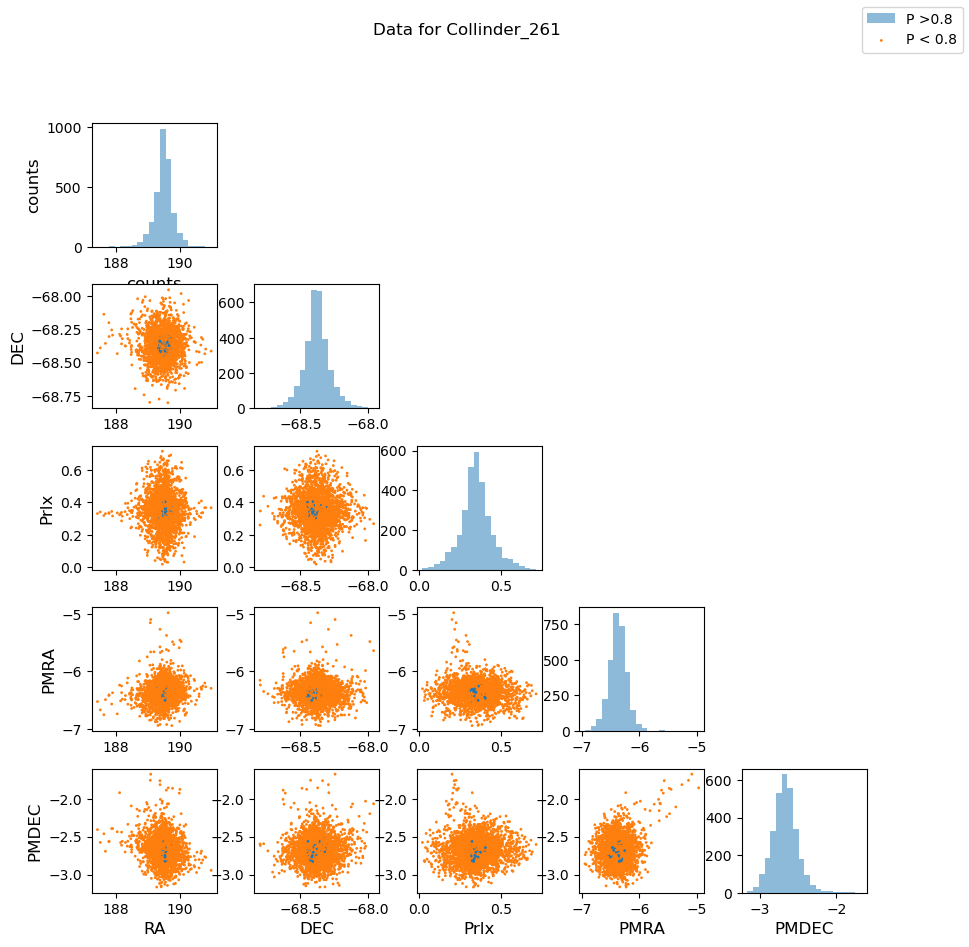

In [8]:
def breakdown(sample_index, sampled_clusters, stars):
    '''Plot the RA, DEC, Proper motion and parallax of a sampled cluster using a mulivariate matrix
    '''
    #take a sample cluster by indexing the sample cluster list
    label=['P >0.8', 'P < 0.8']
    test_cluster = sampled_clusters.Name.iloc[int(sample_index)]
    #find all the stars in the cluster
    temp_df = stars[stars['Name'].str.contains(test_cluster, case=False)]
    #filter and color by probability
    #create a new column in the dataframe that stores the color of the probability
    temp_df['Color'] = np.where(temp_df['Prob'] > 0.8, 'tab:blue', 'tab:orange')
    #labels for axes
    labels = ['RA','DEC','Prlx','PMRA','PMDEC']
    #select the data i want to plot
    data = [temp_df['RAdeg'], temp_df['DEdeg'], temp_df['Plx'], temp_df['pmRA'], temp_df['pmDE']]
    ndims = len(data)
    fig, axes = plt.subplots(5,5,figsize=(10,10))
    fig.subplots_adjust(wspace=0.3,hspace=0.3)
    fig.suptitle("Data for " + test_cluster)
    
    for i in range(ndims): ## y dimension of grid
        for j in range(ndims): ## x dimension of grid
            if i == j:
                axes[i,j].hist(data[i], bins=20,alpha=0.5,)
            elif i > j:
                axes[i,j].scatter(data[j], data[i],color=temp_df['Color'],s=1)
            else:
                axes[i,j].axis('off')
            if j == 0:
                if i == j:
                    axes[i,j].set_xlabel('counts',fontsize=12)
                    axes[i,j].set_ylabel('counts',fontsize=12)
                else:
                    axes[i,j].set_ylabel(labels[i],fontsize=12)
            if i == 4:
                axes[i,j].set_xlabel(labels[j],fontsize=12)    
    fig.legend(labels=label)
    plt.show()
    return temp_df
first_cluster = breakdown(0,my_sample_cluster, stars)


Repeat for all 4 sampled clusters

/tmp/ipykernel_2603/1034341954.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Color'] = np.where(temp_df['Prob'] > 0.8, 'tab:blue', 'tab:orange')


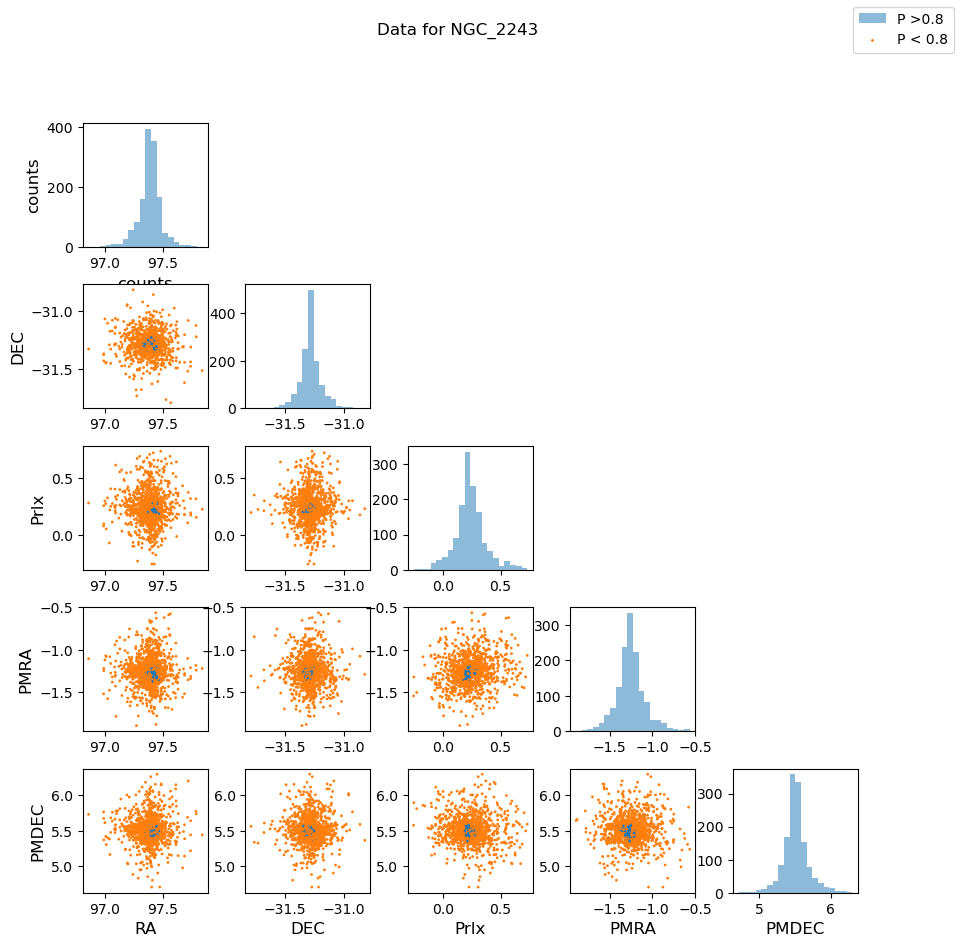

In [9]:
second_cluster = breakdown(1,my_sample_cluster, stars)

/tmp/ipykernel_2603/1034341954.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Color'] = np.where(temp_df['Prob'] > 0.8, 'tab:blue', 'tab:orange')


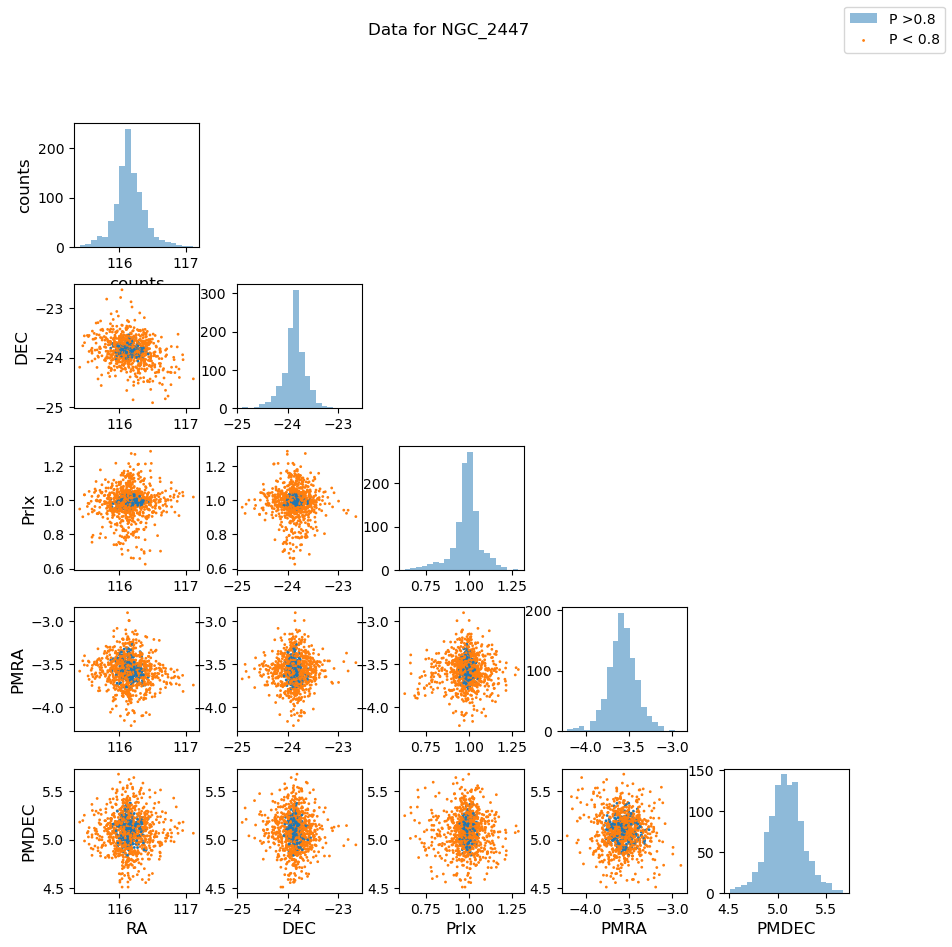

In [10]:
third_cluster = breakdown(2,my_sample_cluster, stars)

/tmp/ipykernel_2603/1034341954.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Color'] = np.where(temp_df['Prob'] > 0.8, 'tab:blue', 'tab:orange')


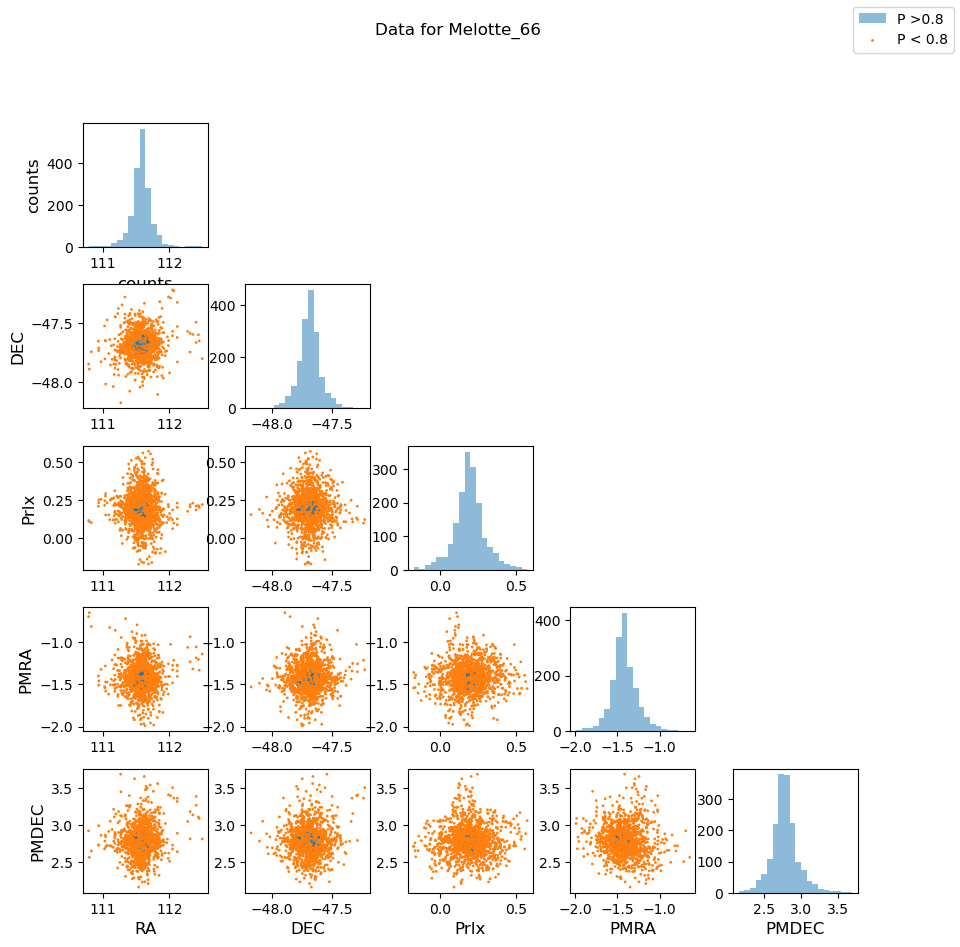

In [11]:
fourth_cluster = breakdown(3,my_sample_cluster, stars)

Comments on Q1 what is the likely reason for the differences between <br>
the distributions of points shown by each subsample

High Probability Analysis, study stars with P > 0.8 below is copied from assignment pdf

In [12]:
stars_hiprob = stars[stars.Prob > 0.8]
clusters_hiprob = stars_hiprob.groupby(['Name']).size().reset_index(name='count')
clusters_sd_hiprob = stars_hiprob.groupby(['Name']).std(numeric_only=True).reset_index()
clusters_sd_hiprob.columns

Index(['Name', 'ID', 'GaiaDR3', 'inrt', 'Prob', 'RAdeg', 'e_RAdeg', 'DEdeg',
       'e_DEdeg', 'GLON', 'GLAT', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Plx',
       'e_Plx', 'pscol', 'e_pscol', 'PlxpmRACor', 'PlxpmDECor', 'pmRApmDECor',
       'PlxpscolCor', 'pmRApscolCor', 'pmDEpscolCor', 'Solved', 'ELAT',
       'nueff', 'RUWE', 'FidelityV1', 'FG', 'e_FG', 'FBP', 'e_FBP', 'FRP',
       'e_FRP', 'Gmag', 'BPmag', 'RPmag', 'BP-RP', 'BP-G', 'G-RP', 'RV',
       'e_RV', 'n_RV', 'o_RV', 'o_RVd', 'GRVSmag', 'e_GRVSmag', 'o_GRVSmag',
       'Vbroad', 'e_Vbroad', 'o_Vbroad', 'NSS', 'RVS'],
      dtype='object')

In [13]:

clusters_hiprob['sd_RAdeg'] = clusters_sd_hiprob['RAdeg']
clusters_hiprob['sd_DEdeg'] = clusters_sd_hiprob['DEdeg']

In [14]:

#use sample_n_clusters function first pick a cluster with more than 200 memebers
#here i sample hiprob_count of stars
hiprob_count = 200
hiprob_200_cluster = clusters_hiprob #sample_n_clusters(clusters_hiprob, hiprob_count,200)
hiprob_200_cluster

,Name,count,sd_RAdeg,sd_DEdeg
0,1636-283,30,0.038488,0.032713
1,ADS_16795,41,5.028249,2.071391
2,AH03_J0748+26.9,28,0.029759,0.034522
3,ASCC_100,87,0.848365,0.904561
4,ASCC_101,149,0.519560,0.886064
...,...,...,...,...
7162,vdBergh_152,25,0.863601,0.201857
7163,vdBergh_80,93,0.336260,0.260737
7164,vdBergh_83,92,0.283638,0.200000
7165,vdBergh_85,105,0.107164,0.077127


filter all the clusters with hiprobabilty by two conditions 1) more than 200 memebers 2) low standard deviation in RA and DEC

In [15]:
def pick_a_cluster_by_sd(hiprob_cluster):
    '''Select a cluster with more than 200 stars, low standard deviation in ra and dec
    input:
    hiprob_cluster = pd dataframe of star clusters
    
    variables:
    max_val : float, maximium standard deviation
    count : integer, maximum number of stars
    filter_cluster: pd dataframe of clusters filtered by low standaard deviation
    
    return:
    one filter_cluster'''
    max_val = 0.1
    count = 200
    filter_cluster = hiprob_cluster[hiprob_cluster['count'] > 200]
    #filter the clusters by low stanadard deviation
    filter_cluster = filter_cluster[filter_cluster['sd_RAdeg'] < max_val]
    filter_cluster = filter_cluster[filter_cluster['sd_DEdeg'] < max_val]

    #return one cluster

    return filter_cluster
clean_cluster = pick_a_cluster_by_sd(hiprob_200_cluster)
clean_cluster # these are now all the clusters with more than 200 stars, and low standard deviation in RA and DEC

,Name,count,sd_RAdeg,sd_DEdeg
217,Berkeley_36,217,0.040135,0.048875
219,Berkeley_39,211,0.029860,0.034516
221,Berkeley_43,205,0.053164,0.051358
1315,Collinder_110,275,0.079560,0.076032
1381,Czernik_41,205,0.062116,0.059241
...,...,...,...,...
6059,Trumpler_25,245,0.045522,0.038393
6070,Trumpler_5,605,0.059707,0.056944
6091,UBC_1020,210,0.079440,0.083825
6124,UBC_106,245,0.060764,0.058970


my cluster will be Trumpler_5 for now

Sample clusters <br> 
NGC_6809	
NGC_2477	
NGC_6231	
NGC_6121
<br>
I used chatgpt to make a 2 by 5 plot template. and modified it to plot my data Chatgpt provided the grid spaces, legends and labels
<br>


In [16]:
def spatial(clean_cluster,stars):
    '''split a dataframe by mean RA and mean DEC:
    input:
    clean_cluster str: a cluster in stars that has the filtering conditions mentioned above
    stars: df all the star clusters

    variables:
    RA_''_mean: dataframes of clusters seperated by mean RA
    DE_''_mean:

    return
    dfs of 
    '''
    temp_df = stars[stars['Name'] == clean_cluster]
    #calculate the means
    mean_RA = temp_df['RAdeg'].mean()
    mean_DE = temp_df['DEdeg'].mean()

    #find all the values of RA below and above the mean and split them into two dataframes
    RA_below_mean  = temp_df[temp_df['RAdeg'] < mean_RA]
    RA_above_mean  = temp_df[temp_df['RAdeg'] > mean_RA]
    
    #repeat for DEC
    DE_below_mean  = temp_df[temp_df['DEdeg'] < mean_DE]
    DE_above_mean  = temp_df[temp_df['DEdeg'] > mean_DE]
    
    data_labels = ['Plx', 'pmRA', 'pmDE', 'Gmag','BP-RP']
    
    #gather all the data i need store as numpy arrays
    RA_below_data = RA_below_mean[data_labels].to_numpy()
    RA_above_data = RA_above_mean[data_labels].to_numpy()
    #same for DEc
    DE_below_data = DE_below_mean[data_labels].to_numpy()
    DE_above_data = DE_below_mean[data_labels].to_numpy()

    #below is a test plot of the histograms  you can uncomment it to see but it affects the 
    return RA_below_data, RA_above_data, DE_below_data, DE_above_data
RA_below_data, RA_above_data, DE_below_data, DE_above_data = spatial('Trumpler_5', stars)

NGC_6809	
NGC_2477	
NGC_6231	
NGC_6121

In [17]:
clusterA = spatial('Trumpler_5', stars)
clusterB = spatial('NGC_6809', stars)
clusterC = spatial('NGC_2477', stars)
clusterD = spatial('NGC_6121', stars)

Method:
Sample four clusters and plot the requested parameters <br>
Assumptions: <br>
The clusters have a normal distriubtion <br>
The sample size is sufficently large > 200, such that the cenetral limit theorm applies <br>
The data is no truncated (counts of stars)

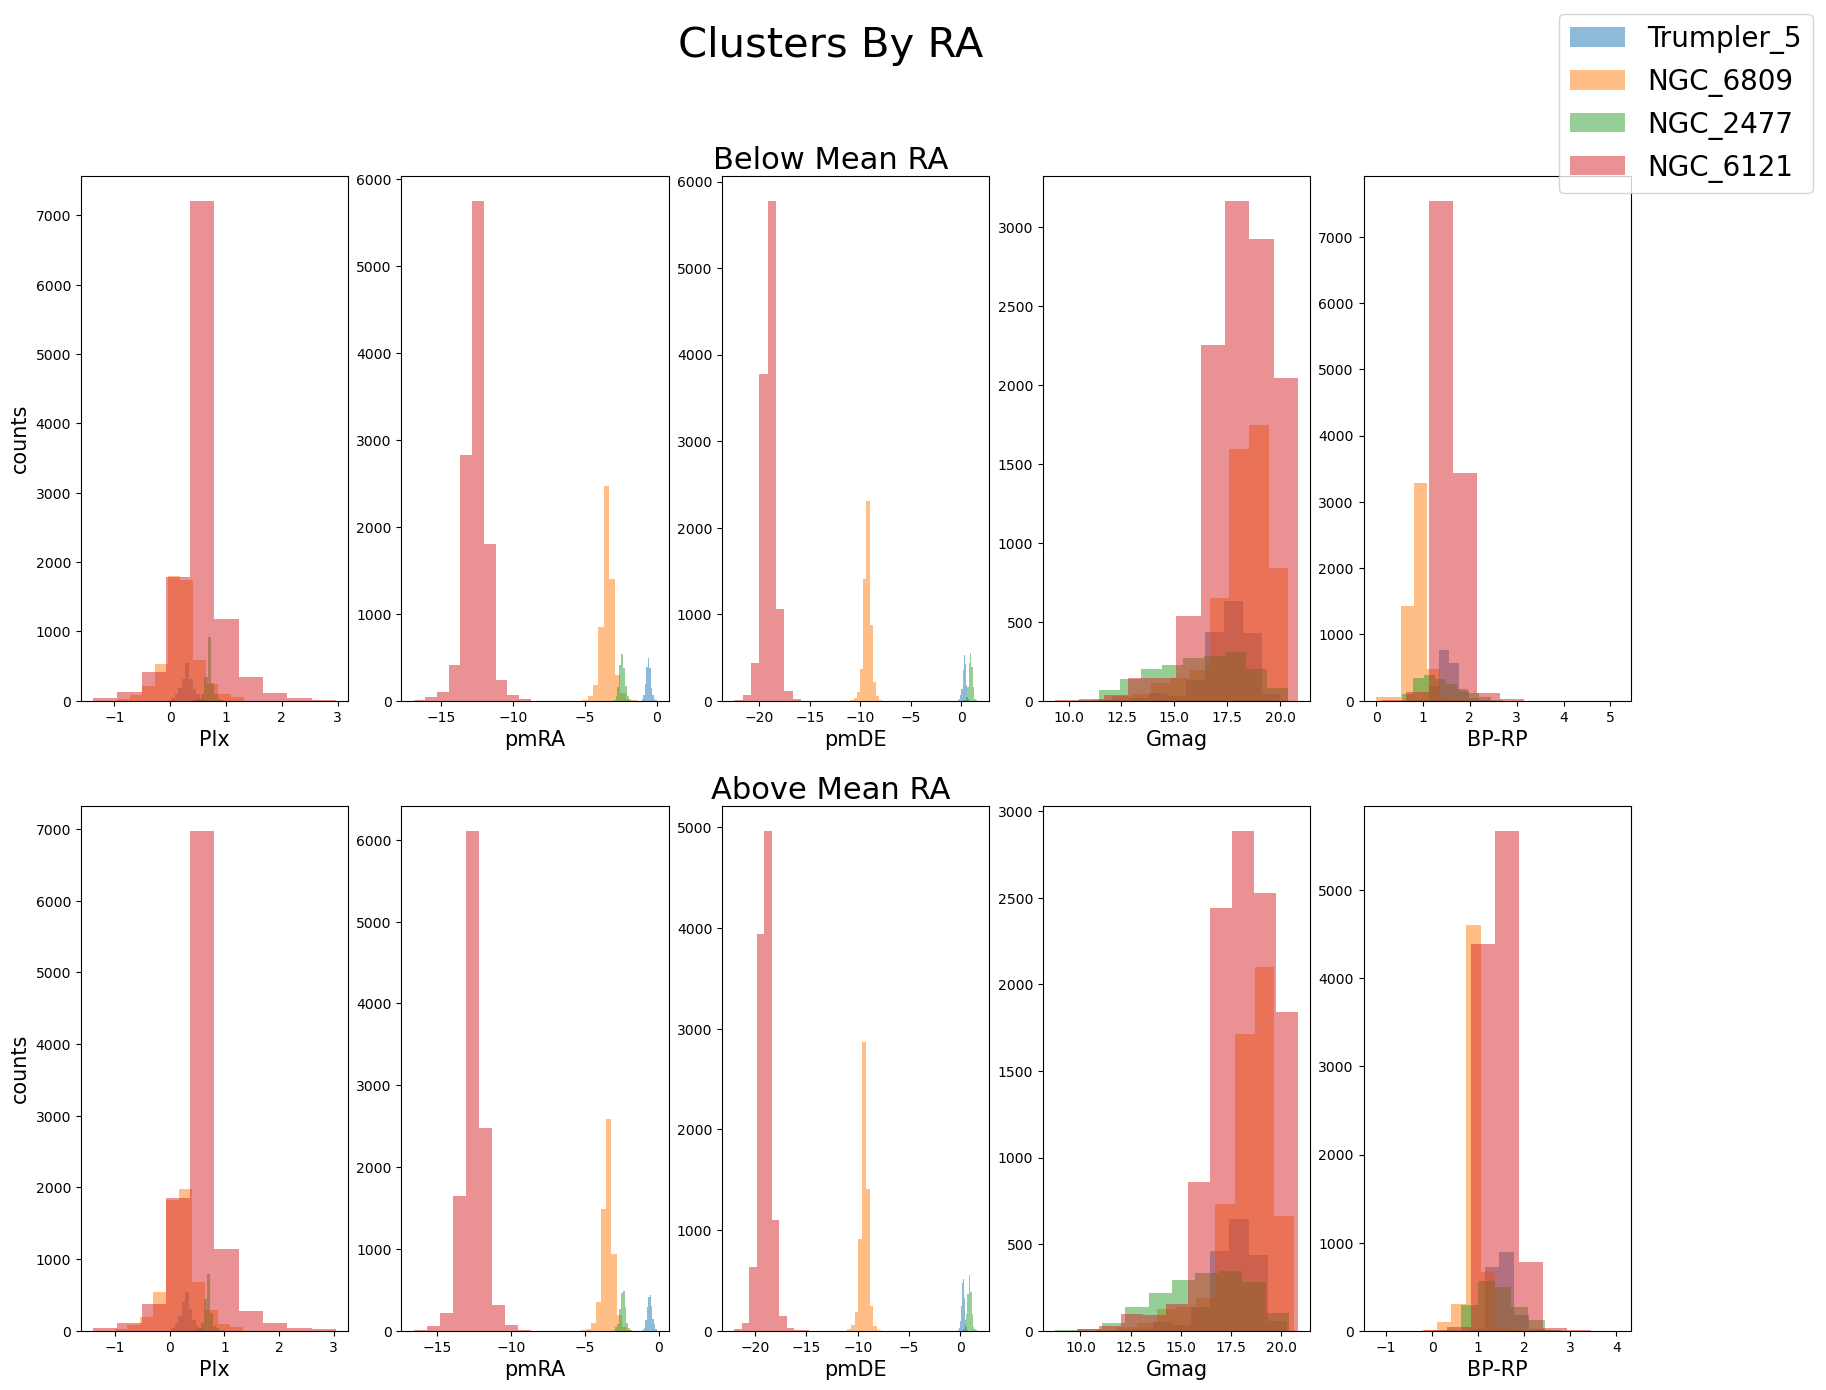

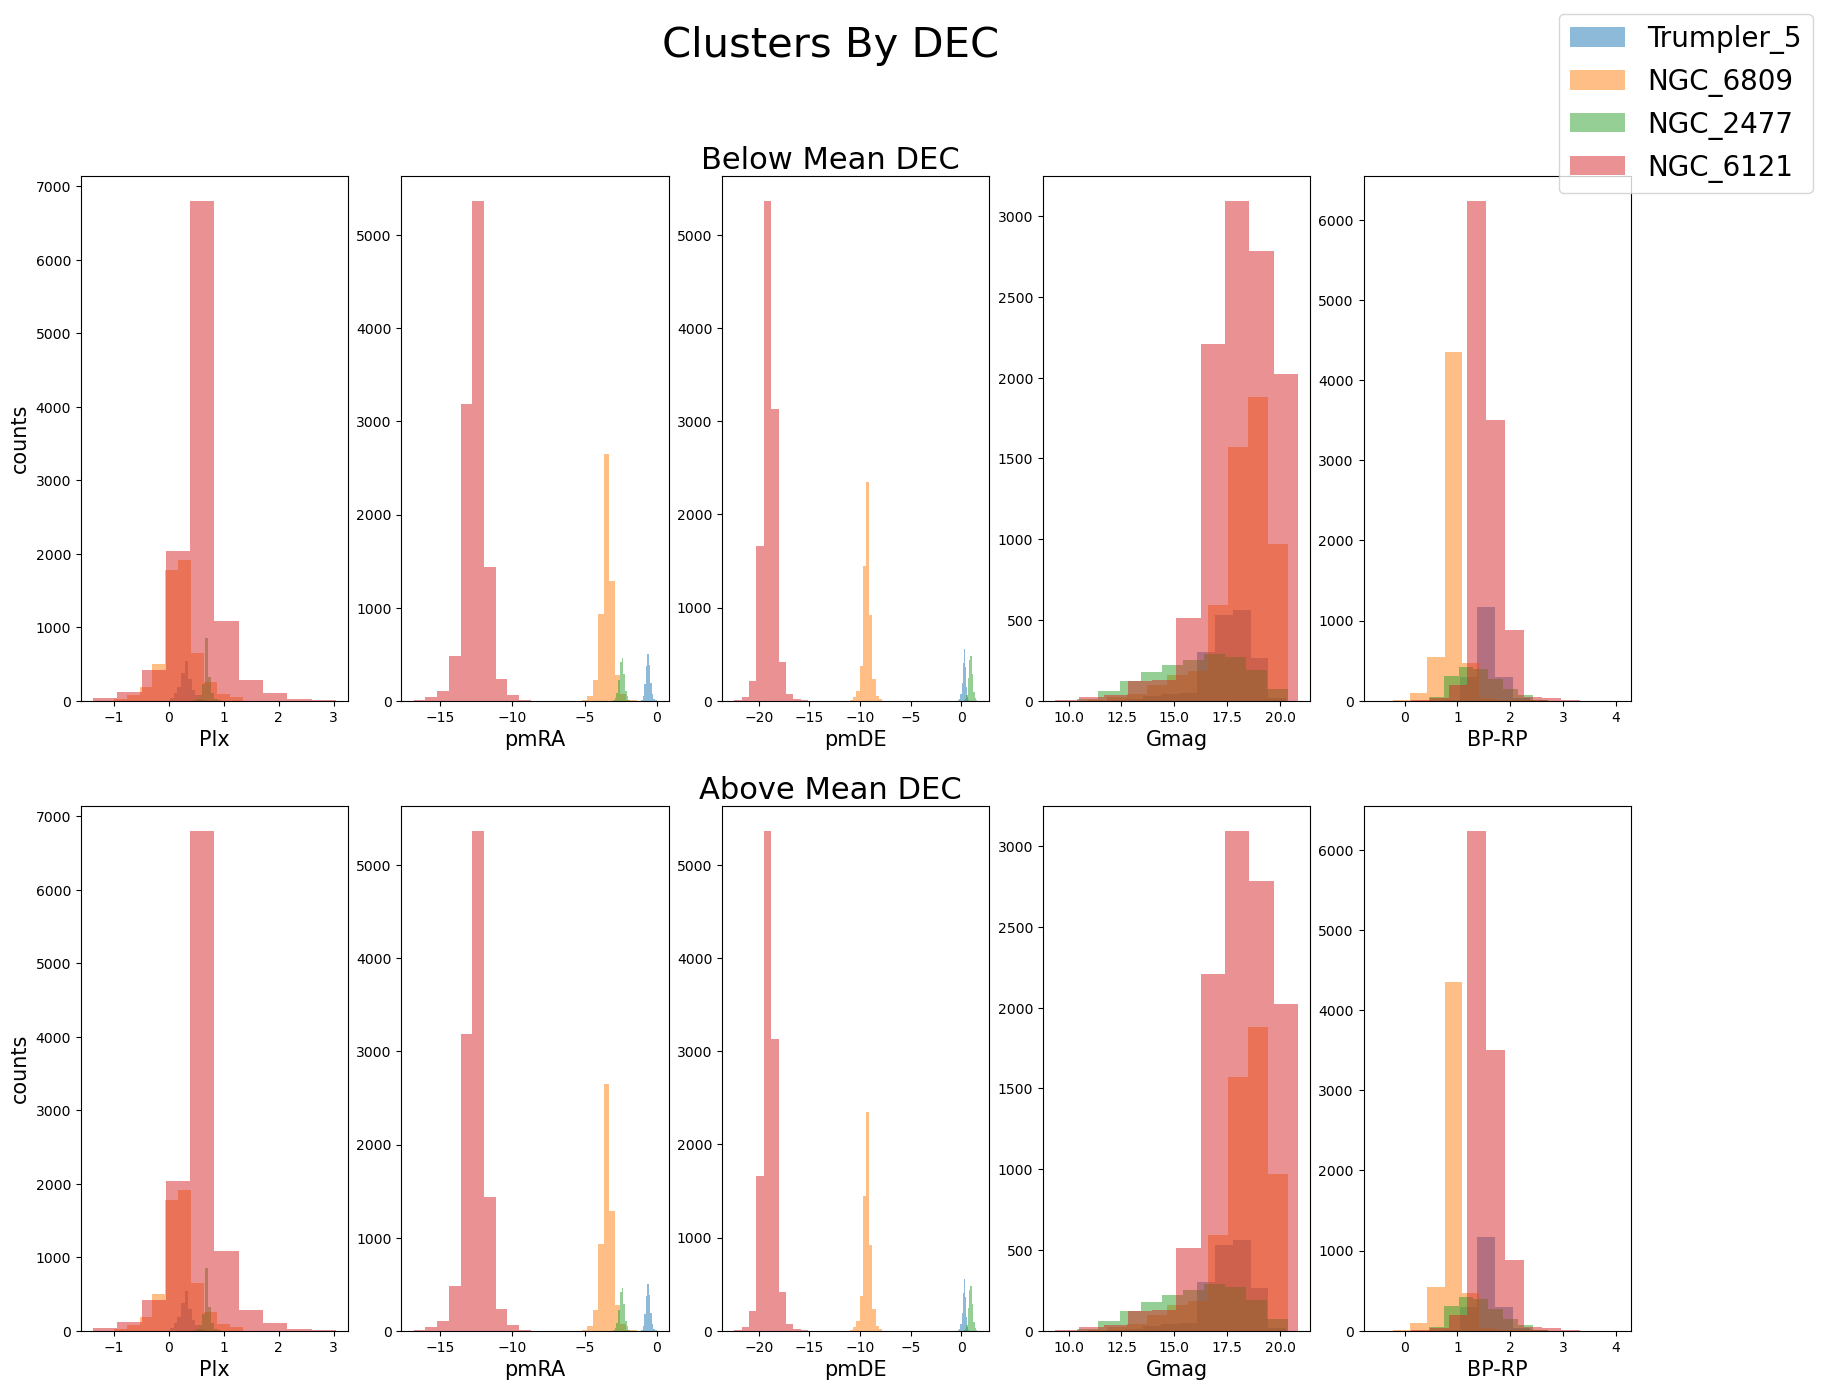

In [18]:
def four_sample_cluster_histrograms():
    '''Create 5 histrogram of four sampled clusters
    Histograms will plot parameters Plx, pmRA, pmDE, Gmag, BP-RP in that order
    
    input:
    arrays of four clusters- each array has the parameters 
    
    variables:
    cluster_list: list to store all sampled clusters

    return:
    2 X 5 histograms divided by Below and above mean RA
    as well as by Below and above mean DEC
    
    '''
    cluster_list = [clusterA, clusterB, clusterC, clusterD]
    nclusters = len(cluster_list)
    nrows = 2
    ncols = 5
    fig, axes = plt.subplots(2, 5, figsize=(20, 15))
    label = ['Trumpler_5', 'NGC_6809','NGC_2477','NGC_6121']
    data_labels = ['Plx', 'pmRA', 'pmDE', 'Gmag','BP-RP']
    bin_size = 20
    fig.suptitle('Clusters By RA', fontsize=30)
    plt.figtext(0.5,0.90, 'Below Mean RA', ha="center", va="top", fontsize=22, color="k")
    plt.figtext(0.5,0.48, "Above Mean RA", ha="center", va="top", fontsize=22, color="k")
    #plot the RA data
    for k in range(nclusters):
        for i in range(nrows): ## y dimension of grid
            for j in range(ncols): ## x dimension of grid
                if i == 0:
                    axes[i,j].hist(cluster_list[k][0][:,j],alpha=0.5)
                    axes[i,j].set_xlabel(data_labels[j],fontsize=15)
                if i ==1:
                    axes[i,j].hist(cluster_list[k][1][:,j],alpha=0.5)
                    axes[i,0].set_ylabel('counts',fontsize=15)
                    axes[i,j].set_xlabel(data_labels[j],fontsize=15)
                if j == 0:
                    if i == j:
                       axes[i,j].set_ylabel('counts',fontsize=15)
    fig.legend(labels=label,fontsize=20)
    plt.show()

    #repeat for DEC
    fig, axes = plt.subplots(2, 5, figsize=(20, 15))
    bin_size = 20
    fig.suptitle('Clusters By DEC', fontsize=30)
    plt.figtext(0.5,0.90, 'Below Mean DEC', ha="center", va="top", fontsize=22, color="k")
    plt.figtext(0.5,0.48, "Above Mean DEC", ha="center", va="top", fontsize=22, color="k")
    for k in range(nclusters):
        for i in range(nrows): ## y dimension of grid
            for j in range(ncols): ## x dimension of grid
                if i == 0:
                    axes[i,j].hist(cluster_list[k][2][:,j],alpha=0.5)
                    axes[i,j].set_xlabel(data_labels[j],fontsize=15)
                if i ==1:
                    axes[i,j].hist(cluster_list[k][3][:,j],alpha=0.5)
                    axes[i,0].set_ylabel('counts',fontsize=15)
                    axes[i,j].set_xlabel(data_labels[j],fontsize=15)
                if j == 0:
                    if i == j:
                       axes[i,j].set_ylabel('counts',fontsize=15)
    fig.legend(labels=label,fontsize=20)
    plt.show()
    return None
cluster_plot = four_sample_cluster_histrograms()

For my Histrograms above i noticed they look super similar to each other, it may have to do with how define my number of bins, for now i let the function decide. I'm assuming the way i calculate the conditionals is correct. And does this mean that the cluster stars dont deviate far from their respective means, so these are globular clusters?


For the ttest the order of the data in each array matters and for consistencty the entire assignment is delivered as <br>
plx, pmRA, pmDE, Gmag and BP-RP <br>

Assumptions: <br>
The parameters have independent samples <br>
assume normal distribution of data <br>
identical variance <br>
The population of stars is sufficently large <br>



Parameter Values for Trumpler_5 by mean RA
['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']
   T-stat    p-value
---------  ---------
-0.156629  0.875546
-2.43625   0.0148885
-0.635039  0.525443
 2.36919   0.0178795
-1.93409   0.0531801


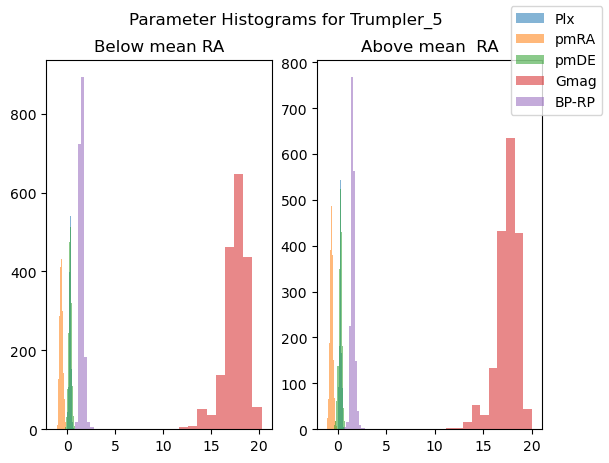

Parameter Values for Trumpler_5 by mean DE
['Plx', 'pmRA', 'pmDE', 'Gmag', 'BP-RP']
  T-stat    p-value
--------  ---------
       0          1
       0          1
       0          1
       0          1
       0          1


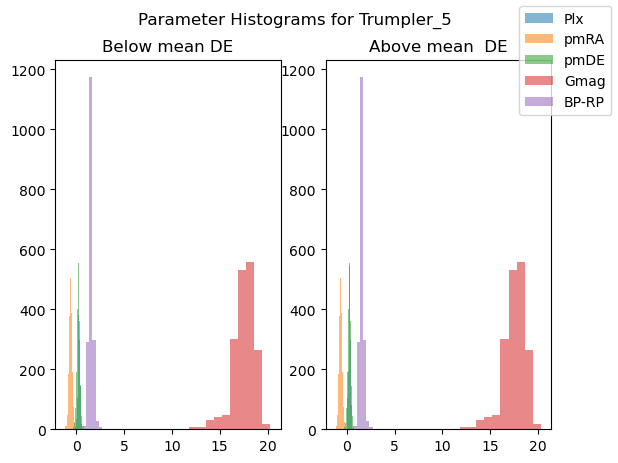

In [19]:
def t_test_arrays(array1_below, array2_after,cluster_name,coord):
    '''Compute a t_test for two arrays of equal size
    compute for  Plx, pmRA, pmDE, Gmag and BP-RP.
    input:
    array1_below, array2_after: np arrays with Plx, pmRA, pmDE, Gmag and BP-RP. in that order
        below: means for values below the mean RA or mean DEC
        after: means for values after or above the mean RA or mean DEC
    cluster_name: str Name of sampled cluster
    coord: str , RA or DEC for showing data seperated either by mean RA or mean DEC
    
    output:
    t_test table of results and pamameter histograms'''

    #there is probably a better way to assign these values

    plx_array1, pmRA_array1, pmDE_array1, Gmag_array1, BP_RP_array1 = array1_below[:,0], array1_below[:,1], array1_below[:,2], array1_below[:,3], array1_below[:,4]
    plx_array2, pmRA_array2, pmDE_array2, Gmag_array2, BP_RP_array2 = array2_after[:,0], array2_after[:,1], array2_after[:,2], array2_after[:,3], array2_after[:,4]

    #compute ttest for each parameter
    t_test_plx = sps.ttest_ind(plx_array1, plx_array2)
    t_test_pmra =  sps.ttest_ind(pmRA_array1, pmRA_array2)
    t_test_pmdec =  sps.ttest_ind(pmDE_array1, pmDE_array2)
    t_test_gmag=  sps.ttest_ind(Gmag_array1, Gmag_array2)
    t_test_bprp =  sps.ttest_ind(BP_RP_array1, BP_RP_array2)

    #make a table of results
    header= ['T-stat', 'p-value']
    data_labels = ['Plx', 'pmRA', 'pmDE', 'Gmag','BP-RP']
    
    table_data = [t_test_plx, t_test_pmra, t_test_pmdec, t_test_gmag,t_test_bprp]
    print("Parameter Values for "+cluster_name+ " by mean "+coord)
    print(data_labels)

    table_of_results = tabulate(table_data, headers=header)
    print(table_of_results)
    #this i took from atplotlib documentation
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Parameter Histograms for '+cluster_name)
    alpha= 0.55
    ax1.hist(plx_array1, alpha=alpha, label=data_labels[0])
    ax1.hist(pmRA_array1, alpha=alpha, label=data_labels[1])
    ax1.hist(pmDE_array1, alpha=alpha, label=data_labels[2])
    ax1.hist(Gmag_array1, alpha=alpha, label=data_labels[3])
    ax1.hist(BP_RP_array1, alpha=alpha, label=data_labels[4])
    ax1.set_title("Below mean "+coord)
    
    ax2.hist(plx_array2, alpha=alpha, label=data_labels[0])
    ax2.hist(pmRA_array2, alpha=alpha, label=data_labels[1])
    ax2.hist(pmDE_array2, alpha=alpha, label=data_labels[2])
    ax2.hist(Gmag_array2, alpha=alpha, label=data_labels[3])
    ax2.hist(BP_RP_array2, alpha=alpha, label=data_labels[4])
    ax2.set_title("Above mean  "+coord)

    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels)
    plt.show()
    
    return None
    
Trumpler_RA = t_test_arrays(RA_above_data, RA_below_data,'Trumpler_5','RA')

Trumpler_DE = t_test_arrays(DE_above_data, DE_below_data,'Trumpler_5','DE')

In [20]:
def get_all_p_values(hiprob_clusters,stars):
    '''Obtain the p value for each cluster in plx, pmRA, pmDE, Gmag, BP-RP
    seperate by mean RA and mean DEC
    
    Chatgpt provided pd merge https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge
    pd merge works by compareing two dataframes and finding common entries by arguement 'on' 
    in this context on='Name' or cluster name. 
    I use merge to find all the clustsers in stars that are more than 200 memebers and low sd

    for each unique cluster
    create a df of only one cluster
    calculate the mean RA and mean DEC for that cluster
    split the cluster by mean RA and DEC

    do a t test for each of the 5 parameters
    store the RA p value for the given parameter in an array, repeat for DEC
    input: 
    hiprob_clusters: pd dataframe of all clusters with more than 200 memebers and low sd
    star: pd dataframe of the raw datafile

    variables:
    p_values_array_RA: 1X5 nested list of p values for each parameter in order stated above for RA
    '            '_DE: same nested list but for DEC

    return
    the two arrays of p_values 

    
    
    '''
    #this i got from chatgpt to find all the clusters within the clean clusters us pd merge

    #find the clusters by name with more than 200 stars and low SD
    the_cluster = pd.merge(hiprob_clusters, stars, on='Name', how='left')
    #keep stars with high probability
    the_cluster = the_cluster[the_cluster['Prob'] > 0.8]

    data_labels = ['Plx', 'pmRA', 'pmDE', 'Gmag','BP-RP']
 
    temp_df = the_cluster
    #find all the unique names in the clean stars dataset
    my_cluster_names = pd.unique(temp_df.Name)
    #create a list to store the p values into by
    #plx, pmRA, pmDE, Gmag, BP-RP in that order
    p_values_array_RA =[[],[],[],[],[]]
    p_values_array_DE =[[],[],[],[],[]]
    #break appart t_test by RA and DEC append results into a list
    for cluster_names in my_cluster_names:
        
        #for each cluster find all the vlaues
        one_cluster_df = temp_df[temp_df['Name'] == cluster_names]
        mean_RA = one_cluster_df['RAdeg'].mean()
        mean_DE = one_cluster_df['DEdeg'].mean()

        RA_below_mean  = one_cluster_df[one_cluster_df['RAdeg'] < mean_RA]
        RA_above_mean  = one_cluster_df[one_cluster_df['RAdeg'] > mean_RA]

        DE_below_mean  = temp_df[temp_df['DEdeg'] < mean_DE]
        DE_above_mean  = temp_df[temp_df['DEdeg'] > mean_DE]


        a = RA_below_mean["Plx"]
        b = RA_above_mean["Plx"]
        
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_RA[0].append(p_val)
        
        a = RA_below_mean["pmRA"]
        b = RA_above_mean["pmRA"]
        
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_RA[1].append(p_val)
        
        a = RA_below_mean["pmDE"]
        b = RA_above_mean["pmDE"]
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_RA[2].append(p_val)

        a = RA_below_mean["Gmag"]
        b = RA_above_mean["Gmag"]
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_RA[3].append(p_val)

        a = RA_below_mean["BP-RP"]
        b = RA_above_mean["BP-RP"]
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_RA[4].append(p_val)
        #repeat for DEC
        a = DE_below_mean["Plx"]
        b = DE_above_mean["Plx"]
        
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_DE[0].append(p_val)
        
        a = DE_below_mean["pmRA"]
        b = DE_above_mean["pmRA"]
        
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_DE[1].append(p_val)
        
        a = DE_below_mean["pmDE"]
        b = DE_above_mean["pmDE"]
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_DE[2].append(p_val)

        a = DE_below_mean["Gmag"]
        b = DE_above_mean["Gmag"]
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_DE[3].append(p_val)

        a = DE_below_mean["BP-RP"]
        b = DE_above_mean["BP-RP"]
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_DE[4].append(p_val)

    return p_values_array_RA, p_values_array_DE
p_values_ra, p_values_de =get_all_p_values(clean_cluster, stars)
#p_values_ra

Method: Calulate the p value for all 5 parameters for each cluster using get_all_p_values() store the resulting p values in an array <br>
orgaize the arrays by mean RA and mean DEC <br>
Assumptions for Ttest: <br>
unknown population mean and variance <br>
indepenent and random observations of the 5 parameters <br>
because we are comparing the data by the means i assume the data before and after the means are depenedent on one another <br>
    $\ $ ie plx.before_mean and plx.after_mean are depenedent and so on for the othe parameters
normal distribution <br>

<br>
make_p_value_histograms() plots the p values for each parameter divided by RA and DEC

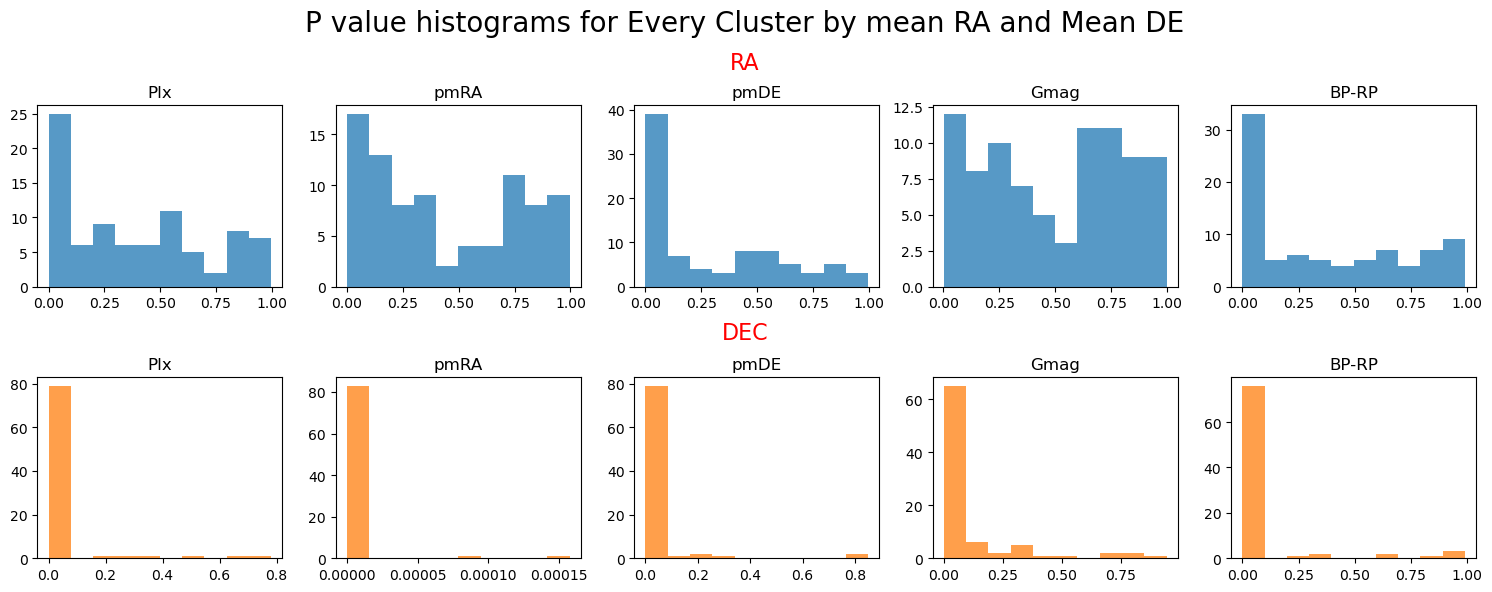

In [21]:
def make_p_value_histrograms(p_val_ra, p_val_de):
    '''Create a historgram of p vlaues for plx, pmRA, pmDE, Gmag, BP-RP of every filtered cluseter
    input:
    p_val_ra, p_val_de: arrays of p values for each parameter by RA and DE
    
    return:
    p values histrograms of the parameters dividd by RA and DEC, in total 10 histrograms'''
    #this template is from chatgpt and i modified it to accept the pvalue arrays
    data_labels = ['Plx', 'pmRA', 'pmDE', 'Gmag','BP-RP']
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('P value histograms for Every Cluster by mean RA and Mean DE',fontsize=20)
    plt.figtext(0.5,0.91, 'RA', ha="center", va="top", fontsize=16, color="r")
    plt.figtext(0.5,0.46, "DEC", ha="center", va="top", fontsize=16, color="r")
    
    # Flatten the 2D array of subplots
    axes = axes.flatten()
    
    # Plot histograms for p_val_ra
    for i in range(len(p_val_ra)):
        axes[i].hist(p_val_ra[i], color='tab:blue', alpha=0.75)
        axes[i].set_title(data_labels[i])
    
    # Plot histograms for p_val_de
    for i in range(len(p_val_ra), len(p_val_ra)+5):
        axes[i].hist(p_val_de[i - 5], color='tab:orange', alpha=0.75)
        axes[i].set_title(data_labels[i - 5])

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig.subplots_adjust(hspace=0.5)
    plt.show()
    return None
p_val_histograms = make_p_value_histrograms(p_values_ra, p_values_de)

Clearly my DEC histograms are skewed to the left, or low p-values, in the context of the ttest this means the sampled paramters in DEC are unlikely to have identical avearages, as described by the scipy null hypothesis.  Either the way i extract and analyze the data is wrong or since the distribution of p-values < 0.05 is large, the distribution of clusters. so the results are significant

I believe my data analysis is wrong

Compute the kolmogorov_smirnov comparing two distributions of data there are two tests for one sample and two samples. <br>
i compute the two sample based on the wording of the assignment and selected the two sample test <br>
The Kolmogorov-Smirnov checks to see if two samples are from similar distributions, the result is a float between 0 and 1


Assumptions: <br>
Continous ditributions <br>
two independent samples <br>


In [40]:
def kolmogorov_smirnov(p_val_ra, p_val_de):
    '''Compute a two sampled KS test for each parameter 
    
    input: 
    p_val_ra, p_val_de: arrays of p values for each parameter by RA and DE
    variables:
    ks_results: list - appended KS results for each parameter p value
    ks_filtered: list - appended KS results for each parameter p value > 0.01
    p_min- float - the minimum threshold p value

    return
    ks_results, ks_filterd
    
    ''' 
    ks_results = []
    ks_filtered = []

    ks_results_dec = []
    ks_filtered_dec = []
    #do the kolmogorov_simrnov test for each parameter
    for i in range(len(p_val_ra)):
        test = sps.kstest(p_val_ra[i],'uniform')
        test_dec = sps.kstest(p_val_de[i], 'uniform')

        #append results
        ks_results.append(test)
        ks_results_dec.append(test_dec)
    #list comprehension to filter p values greater than 0.01
    p_min = 0.01
    p_ra_filter = [[p for p in nested_list if p  > p_min] for nested_list in p_val_ra]
    #repeat for dec
    p_de_filter = [[p for p in nested_list if p  > p_min] for nested_list in p_val_de]
    #repeat the olmogorov_simrnow for the filetered times
    
    temp_test = sps.kstest(p_ra_filter[0],'uniform')
    temp_test_dec = sps.kstest(p_de_filter[0], 'uniform')
    ks_filtered.append(temp_test)
    ks_filtered_dec.append(temp_test_dec)
    
    for i in range(2,5):
        test = sps.kstest(p_ra_filter[i],'uniform')
        test_dec = sps.kstest(p_de_filter[i],'uniform') 
        ks_filtered.append(test)
        ks_filtered_dec.append(test_dec)

    return ks_results, ks_results_dec, ks_filtered, ks_filtered_dec
ks_results, ks_results_dec, ks_filtered, ks_filtered_dec= kolmogorov_smirnov(p_values_ra,p_values_de)

ks_results
print("RA Results of KS Test for all p values, round to 3sf")
print("Plx KS Tstat:", round(ks_results[0][0],3),'p_value = ',round(ks_results[0][1],3))
print("pmRA KS Tstat:", round(ks_results[1][0],3),'p_value = ',round(ks_results[1][1],3))
print("pmDE KS Tstat:", round(ks_results[2][0],3),'p_value = ',round(ks_results[2][1],3))
print("Gmag KS Tstat:", round(ks_results[3][0],3),'p_value = ',round(ks_results[3][1],3))
print("BP-RP KS Tstat:", round(ks_results[4][0],3),'p_value = ',round(ks_results[4][1],3))
print('')
print("DEC Results of KS Test for all p values, round to 3sf")
print("Plx KS Tstat:", round(ks_results_dec[0][0],3),'p_value = ',round(ks_results_dec[0][1],3))
print("pmRA KS Tstat:", round(ks_results_dec[1][0],3),'p_value = ',round(ks_results_dec[1][1],3))
print("pmDE KS Tstat:", round(ks_results_dec[2][0],3),'p_value = ',round(ks_results_dec[2][1],3))
print("Gmag KS Tstat:", round(ks_results_dec[3][0],3),'p_value = ',round(ks_results_dec[3][1],3))
print("BP-RP KS Tstat:", round(ks_results_dec[4][0],3),'p_value = ',round(ks_results_dec[4][1],3))



RA Results of KS Test for all p values, round to 3sf
Plx KS Tstat: 0.215 p_value =  0.001
pmRA KS Tstat: 0.175 p_value =  0.01
pmDE KS Tstat: 0.378 p_value =  0.0
Gmag KS Tstat: 0.085 p_value =  0.538
BP-RP KS Tstat: 0.291 p_value =  0.0

DEC Results of KS Test for all p values, round to 3sf
Plx KS Tstat: 0.927 p_value =  0.0
pmRA KS Tstat: 1.0 p_value =  0.0
pmDE KS Tstat: 0.917 p_value =  0.0
Gmag KS Tstat: 0.692 p_value =  0.0
BP-RP KS Tstat: 0.86 p_value =  0.0


These Tstat values are significant as they are each near one. Meaning the sampled parameters come from similar distributions. My p-values are not zero but extremely small, this more confirms we can reject the null that they are completely identical.

for some reason my p values for pmRA_DEC has no p values greater than 0.01 so i skip that array since i get the <br> errorValueError: Data passed to ks_2samp must not be empty

In [44]:

print("RA Results of KS Test for p > 0.01, round to 3sf")
print("Plx KS Tstat:", round(ks_filtered[0][0],3), ',p_value = ',round(ks_filtered[0][1],3))
print("pmRA KS Tstat:", round(ks_filtered[1][0],3),',p_value = ',round(ks_filtered[1][1],3))
print("Gmag KS Tstat:", round(ks_filtered[2][0],3), ',p_value = ',round(ks_filtered[2][1],3))
print("BP-RP KS Tstat:", round(ks_filtered[3][0],3), ',p_value = ',round(ks_filtered[3][1],3))
print('')
print("DEC Results of KS Test for p > 0.01, round to 3sf")
print("Plx KS Tstat:", round(ks_filtered_dec[0][0],3), ',p_value = ',round(ks_filtered_dec[0][1],3))
print("pmRA KS Tstat:", round(ks_filtered_dec[1][0],3),',p_value = ',round(ks_filtered_dec[1][1],3))
print("Gmag KS Tstat:", round(ks_filtered_dec[2][0],3), ',p_value = ',round(ks_filtered_dec[2][1],3))
print("BP-RP KS Tstat:", round(ks_filtered_dec[3][0],3), ',p_value = ',round(ks_filtered_dec[3][1],3))

RA Results of KS Test for p > 0.01, round to 3sf
Plx KS Tstat: 0.145 ,p_value =  0.071
pmRA KS Tstat: 0.236 ,p_value =  0.001
Gmag KS Tstat: 0.086 ,p_value =  0.528
BP-RP KS Tstat: 0.16 ,p_value =  0.05

DEC Results of KS Test for p > 0.01, round to 3sf
Plx KS Tstat: 0.219 ,p_value =  0.882
pmRA KS Tstat: 0.435 ,p_value =  0.102
Gmag KS Tstat: 0.424 ,p_value =  0.0
BP-RP KS Tstat: 0.265 ,p_value =  0.269


Th KS stat for p > 0.01: is much smaller for each parameter, ad for pmDEC no p value was over 0.01 and i encountered the error stated
this is more of a verification that there is an error in my analysis as stated before, im not correctly sampling from the distribution. 
The p values are significantly large with the exception of Gmag, saying we cannot reject the null-hypothesis. The distributions are completely identical 